#Projeto Final de Visualização de Dados

Curso: **Diversidade Tech - Ada & Suzano**

Módulo: **DS-PY-005 - TÉCNICAS DE PROGRAMAÇÃO II (PY)**

Facilitador: **Carlos Stefano**

###Grupo 2 - Integrantes:
- Anderson Miranda
- Gabriel Lima
- Lucas Freire de Carvalho Galvão
- Nilo B. Silva Jr.


# EDA - Exploratory Data Analysis

![EDA](https://raw.githubusercontent.com/aluipio/eda_ada_tpii_football/main/imagem.png)

##Sobre a Análise Exploratória de Dados:

Processo de examinar conjuntos de dados com finalidade de encontrar padrões ou anomalias, encontrar relações matemáticas features, aplicar testes estatísticos, quando necessários, e gerar insights com finalidade de expor problemas e apoiar tomadas de decisão.

Após definido o problema, o ponto de partida da análise exploratória dos dados é compreender a estrutura e/ou arquitetura dos dados, partindo desse ponto como alicerce na construção do conhecimento.

Conhecido os dados realiza-se a preparação destes, visando: a limpeza, a deleção dos dados irrelevantes para o problema e a transformação, seguindo com a Análise de Dados propriamente dita. Esta busca descrever os dados, tipificar as variáveis, e orientar os métodos de análise a serem aplicados. Encerrando, desse modo, com a conclusão da análise.

## Sobre a Origem dos Dados

Os dados foram retirados da plataforma Kaggle, tendo como fonte primária o banco de dados da FIFA - Fédération Internationale de Football Association (Federação Internacional de Futebol), construído com os dados dos jogadores durante a temporada europeia 2021-2022.

Cada linha de dados está associada a um jogador, contendo dados de sua performance em campo ao longo da temporada.

**Estatísticas dos Jogadores das Ligas Europeias de Futebol Temporada (2021-2022)**



Fonte: https://www.kaggle.com/datasets/vivovinco/20212022-football-player-stats

#Objetivo da análise:

A análise desse dataset serve de apoio a tomada de decisão em diversas situações. Dentre elas, podemos destacar:
- Investimento publicitário no time ou atleta; 
- Melhorias no treinamento técnico e tático;
- Negociação de passes de jogadores entre times e investidores;
- Cálculo da margem de confiança no pagamento de aposta;

Observações: Nessa análise não será aplicado nenhum modelo preditivo

#Bibliotecas necessárias

In [ ]:
#Importando bibliotecas 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
#Configuração do Pandas
pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 150)

#1 . Os Dados

In [ ]:
football_stats = pd.read_csv("https://raw.githubusercontent.com/aluipio/eda_data_analyst/main/ada_tpii_eda_football/2021-2022%20Football%20Player%20Stats.csv", sep = ';', encoding = 'ISO-8859-1')

In [ ]:
football_stats.head()

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Goals,Shots,SoT,SoT%,G/Sh,G/SoT,ShoDist,ShoFK,ShoPK,PKatt,PasTotCmp,PasTotAtt,PasTotCmp%,PasTotDist,PasTotPrgDist,PasShoCmp,PasShoAtt,PasShoCmp%,PasMedCmp,PasMedAtt,PasMedCmp%,PasLonCmp,PasLonAtt,PasLonCmp%,Assists,PasAss,Pas3rd,PPA,CrsPA,PasProg,PasAtt,PasLive,PasDead,PasFK,TB,PasPress,Sw,PasCrs,CK,CkIn,CkOut,CkStr,PasGround,PasLow,PasHigh,PaswLeft,PaswRight,PaswHead,TI,PaswOther,PasCmp,PasOff,PasOut,PasInt,PasBlocks,SCA,ScaPassLive,ScaPassDead,ScaDrib,ScaSh,ScaFld,ScaDef,GCA,GcaPassLive,GcaPassDead,GcaDrib,GcaSh,GcaFld,GcaDef,Tkl,TklWon,TklDef3rd,TklMid3rd,TklAtt3rd,TklDri,TklDriAtt,TklDri%,TklDriPast,Press,PresSucc,Press%,PresDef3rd,PresMid3rd,PresAtt3rd,Blocks,BlkSh,BlkShSv,BlkPass,Int,Tkl+Int,Clr,Err,Touches,TouDefPen,TouDef3rd,TouMid3rd,TouAtt3rd,TouAttPen,TouLive,DriSucc,DriAtt,DriSucc%,DriPast,DriMegs,Carries,CarTotDist,CarPrgDist,CarProg,Car3rd,CPA,CarMis,CarDis,RecTarg,Rec,Rec%,RecProg,CrdY,CrdR,2CrdY,Fls,Fld,Off,Crs,TklW,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%
0,1,Max Aarons,ENG,DF,Norwich City,Premier League,22.0,2000,34,32,2881,32.0,0.00,0.41,0.06,15.4,0.00,0.00,20.5,0.0,0.0,0.0,34.0,45.0,75.5,574.1,214.8,17.5,19.4,90.0,13.1,17.0,77.0,3.06,6.78,45.2,0.06,0.59,1.56,1.13,0.25,2.94,45.0,34.4,10.60,0.84,0.06,5.41,0.59,1.41,0.00,0.0,0.0,0.0,26.5,9.59,8.94,4.91,29.0,0.91,9.72,0.06,34.0,0.22,0.88,1.63,1.75,1.19,0.84,0.06,0.09,0.13,0.06,0.00,0.16,0.16,0.0,0.00,0.0,0.00,0.0,2.16,1.16,1.56,0.59,0.00,1.16,1.81,63.8,0.66,13.6,3.53,26.0,7.97,4.38,1.22,2.69,0.69,0.03,2.00,1.75,3.91,2.19,0.0,58.0,5.06,23.3,23.8,15.0,0.91,47.8,1.03,2.44,42.3,1.09,0.19,33.9,199.4,121.7,5.44,1.66,0.41,0.84,0.94,36.0,32.4,89.9,1.28,0.25,0.00,0.00,0.97,1.84,0.03,1.41,1.16,0.0,0.06,0.03,5.53,0.47,1.59,22.7
1,2,Yunis Abdelhamid,MAR,DF,Reims,Ligue 1,34.0,1987,34,34,2983,33.1,0.06,0.54,0.18,33.3,0.11,0.33,18.7,0.0,0.0,0.0,38.7,47.0,82.4,835.8,287.9,10.2,11.4,89.9,22.4,25.0,89.4,5.65,9.15,61.7,0.00,0.24,2.45,0.18,0.00,2.72,47.0,44.0,3.02,2.45,0.00,5.68,1.66,0.06,0.00,0.0,0.0,0.0,35.3,3.78,7.95,31.70,12.1,1.48,0.42,0.12,38.7,0.15,0.97,1.24,0.88,0.63,0.42,0.00,0.09,0.03,0.00,0.09,0.03,0.00,0.0,0.03,0.0,0.00,0.0,1.87,1.39,1.24,0.60,0.03,0.39,0.82,48.1,0.42,13.6,4.89,35.9,7.61,5.14,0.88,1.87,0.79,0.06,1.09,3.11,4.98,3.20,0.0,57.3,8.28,32.8,25.7,2.9,0.85,54.5,0.48,0.66,72.7,0.48,0.03,35.7,204.7,115.5,2.75,0.73,0.00,0.45,0.39,37.5,36.3,96.9,0.36,0.15,0.03,0.00,1.30,0.73,0.00,0.06,1.39,0.0,0.03,0.00,6.77,2.02,1.36,59.8
2,3,Salis Abdul Samed,GHA,MF,Clermont Foot,Ligue 1,22.0,2000,31,29,2462,27.4,0.04,0.66,0.18,27.8,0.06,0.20,20.3,0.0,0.0,0.0,55.9,61.0,91.7,1033.3,184.4,22.5,24.1,93.5,25.8,27.2,94.9,6.72,7.81,86.0,0.00,0.55,2.81,0.47,0.04,2.96,61.0,60.3,0.73,0.58,0.04,8.03,0.80,0.36,0.00,0.0,0.0,0.0,52.6,4.71,3.72,4.82,53.1,1.90,0.15,0.29,55.9,0.07,0.58,1.24,0.84,1.46,1.09,0.00,0.00,0.15,0.15,0.07,0.04,0.04,0.0,0.00,0.0,0.00,0.0,2.01,1.24,0.91,0.91,0.18,0.69,2.15,32.2,1.46,23.4,6.53,27.9,7.19,12.30,3.94,0.99,0.04,0.00,0.95,1.86,3.87,0.55,0.0,70.4,2.01,22.7,41.8,10.9,0.62,69.9,0.99,1.53,64.3,1.09,0.07,53.5,246.5,106.3,2.85,0.73,0.15,0.84,1.46,58.6,54.2,92.5,1.72,0.44,0.11,0.07,1.64,1.28,0.00,0.36,1.24,0.0,0.00,0.00,8.76,0.88,0.88,50.0
3,4,Laurent Abergel,FRA,MF,Lorient,Ligue 1,29.0,1993,34,34,2956,32.8,0.00,0.91,0.21,23.3,0.00,0.00,22.6,0.0,0.0,0.0,40.7,49.8,81.6,780.8,206.0,16.3,18.4,88.6,17.3,19.6,87.9,6.25,9.39,66.6,0.06,0.91,3.87,0.58,0.18,4.18,49.8,49.0,0.85,0.64,0.18,9.48,1.49,0.79,0.03,0.0,0.0,0.0,37.6,5.64,6.65,4.48,43.9,0.73,0.15,0.15,40.7,0.21,0.55,1.83,1.68,2.01,1.49,0.06,0.03,0.03,0.21,0.18,0.15,0.12,0.0,0.00,0.0,0.03,0.0,3.57,2.23,1.49,1.71,0.37,1.80,4.97,36.2,3.17,28.0,7.90,28.2,9.27,15.30,3.41,1.68,0.09,0.00,1.59,2.56,6.13,0.34,0.0,61.6,0.67,13.7,40.3,11.6,0.46,60.9,1.28,1.98,64.6,1.34,0.09,45.7,171.9,86.4,2.87,1.13,0.09,0.85,1.46,46.3,43.0,93.0,1.86,0.27,0.00,0.00,1.40,2.07,0.03,0.79,2.23,0.0,0.00,0.00,8.87,0.43,0.43,50.0
4,5,Charles Abi,FRA,FW,Saint-Étienne,Ligue 1,22.0,2000,1,1,45,0.5

Pode-se observar que o dataset possui features dominantes e derivativas das dominantes, sendo algumas de interesse da análise e outras descartáveis.

**Verificando valores nulos e tipo de variáveis (features) do conjunto de dados.**

In [ ]:
football_stats.shape

(2921, 143)

In [ ]:
football_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2921 entries, 0 to 2920
Columns: 143 entries, Rk to AerWon%
dtypes: float64(133), int64(5), object(5)
memory usage: 3.2+ MB


Observamos que no banco de dados exitem 2.941 jogadores, com 143 feature, correspondendo ao tamanho do dataset.

#2 . Processamento de dados

##Pré-Processamento

Considerando o grande volume de dados, selecionamos e tratamos 34 variáveis de interesse, a saber:

In [ ]:
df = pd.DataFrame()
df['Player'] = football_stats['Player']                                                                               #Nome jogador
df['Nation'] = football_stats['Nation']                                                                               #Nacionalidade
df['Pos'] = football_stats['Pos']                                                                                     #Posição
df['Squad'] = football_stats['Squad']                                                                                 #Time
df['Comp'] = football_stats['Comp']                                                                                   #Competição (Liga)
df['Age'] = football_stats['Age']                                                                                     #Idade
df['MP'] = football_stats['MP']                                                                                       #Partidas jogadas
df['Starts'] = football_stats['Starts']                                                                               #Partidas como titular (iniciou o jogo)
df['90s'] = football_stats['90s']                                                                                     #Partidas completas (minutos jogados / 90)
df['G/90'] = football_stats['Goals']                                                                                  #Gols marcados por partidas (90 minutos)
df['G/Sh'] = football_stats['G/Sh']                                                                                   #Gols por chute
df['PKGoals'] = ((football_stats['ShoPK'] * football_stats['Min']) / 90).round(0).astype(int)                         #Gols de pênalti
df['PKAttempted'] = ((football_stats['PKatt'] * football_stats['Min']) / 90).round(0).astype(int)                     #Pênaltis cobrados
df['Goals'] = ((football_stats['Goals'] * football_stats['Min']) / 90).round(0).astype(int)                           #Gols marcados (exceto pênalti )
df['Pass'] = ((football_stats['PasTotAtt'] * football_stats['Min']) / 90).round(0).astype(int)                        #Passes
df['PassCompleted'] = ((football_stats['PasTotCmp'] * football_stats['Min']) / 90).round(0).astype(int)               #Passes completos
df['PassComp%'] = ((df['PassCompleted'] / df['Pass']) * 100).round(2)                                                 #% passes completos
df['Assist'] = ((football_stats['Assists'] * football_stats['Min']) / 90).round(0).astype(int)                        #Assistências
df['Cross'] = ((football_stats['PasCrs'] * football_stats['Min']) / 90).round(0).astype(int)                          #Cruzamentos
df['CrossCompleted'] = ((football_stats['CrsPA'] * football_stats['Min']) / 90).round(0).astype(int)                  #Cruzamentos completos
df['CrossComp%'] = ((df['CrossCompleted'] / df['Cross']) * 100).round(2)                                              #% cruzamentos completos
df['Tackle_Won'] = ((football_stats['TklWon'] * football_stats['Min']) / 90).round(0).astype(int)                     #Disputa de bola ganha
df['SucDribble'] = ((football_stats['DriSucc'] * football_stats['Min']) / 90).round(0).astype(int)                    #Dribles com sucesso
df['Dribble'] = ((football_stats['DriAtt'] * football_stats['Min']) / 90).round(0).astype(int)                        #Dribles tentados
df['DribbleComp%'] = ((df['SucDribble'] / df['Dribble']) * 100).round(2)                                              #% dribles com sucesso 
df['YCards'] = ((football_stats['CrdY'] * football_stats['Min']) / 90).round(0).astype(int)                           #Cartões amarelos
df['RCards'] = ((football_stats['CrdR'] * football_stats['Min']) / 90).round(0).astype(int)                           #Cartões vermelhos
df['Cards'] = df['YCards'] + df['RCards']                                                                             #Total de Cartões
df['Fls'] = ((football_stats['Fls'] * football_stats['Min']) / 90).round(0).astype(int)                               #Faltas cometidas
df['Fld'] = ((football_stats['Fld'] * football_stats['Min']) / 90).round(0).astype(int)                               #Faltas sofridas
df['OGoals'] = ((football_stats['OG'] * football_stats['Min']) / 90).round(0).astype(int)                             #Gols contra
df['AerWon'] = ((football_stats['AerWon'] * football_stats['Min']) / 90).round(0).astype(int)                         #Jogadas aéreas ganhas
df['AerLost'] = ((football_stats['AerLost'] * football_stats['Min']) / 90).round(0).astype(int)                       #Jogadas aéreas perdidas
df['AerWon%'] = ((football_stats['AerWon'] / (football_stats['AerWon'] + football_stats['AerLost'])) * 100).round(2)  #% jogadas aéreas ganhas 

In [ ]:
#Atualizado a variável posição
df['Pos'] = df['Pos'].apply(lambda x: 'GK'   if x == 'GKMF' else
                                      'FWMF' if x == 'MFFW' else
                                      'MFDF' if x == 'DFMF' else
                                      'DFFW' if x == 'FWDF' else x)

In [ ]:
#Calculando as variáveis de Penaltis Perdidos e % de Penaltis Perdidos
df['PKLoss'] = df['PKAttempted']-df['PKGoals']
df['PKLoss%'] = df['PKLoss'] / df['PKAttempted']

In [ ]:
#Criando a variável de identificação de Estrangeiros (Não Europeu)
Europe = ['FRA', 'ENG', 'ITA', 'SCO', 'ARM', 'GER', 'SUI', 'ESP', 'AUT', 'NOR',
          'REU', 'NED', 'TUR', 'POR', 'WAL', 'DEN', 'SRB', 'BUL', 'ALB', 'SWE',
          'BEL', 'CZE', 'LUX', 'CRO', 'IRL', 'POL', 'BIH', 'SVN', 'ROU', 'SVK',
          'ISL', 'NIR', 'HUN', 'FIN', 'MNE', 'GRE', 'CYP', 'UKR', 'GEO']
df['Foreign'] = df['Nation'].apply(lambda x: 0 if x in Europe else 1)

O Dataset de interesse

In [ ]:
df.head()

,Player,Nation,Pos,Squad,Comp,Age,MP,Starts,90s,G/90,G/Sh,PKGoals,PKAttempted,Goals,Pass,PassCompleted,PassComp%,Assist,Cross,CrossCompleted,CrossComp%,Tackle_Won,SucDribble,Dribble,DribbleComp%,YCards,RCards,Cards,Fls,Fld,OGoals,AerWon,AerLost,AerWon%,PKLoss,PKLoss%,Foreign
0,Max Aarons,ENG,DF,Norwich City,Premier League,22.0,34,32,32.0,0.00,0.00,0,0,0,1440,1088,75.56,2,45,8,17.78,37,33,78,42.31,8,0,8,31,59,1,15,51,22.82,0,NaN,0
1,Yunis Abdelhamid,MAR,DF,Reims,Ligue 1,34.0,34,34,33.1,0.06,0.11,0,0,2,1558,1283,82.35,0,2,0,0.00,46,16,22,72.73,5,1,6,43,24,0,67,45,59.76,0,NaN,1
2,Salis Abdul Samed,GHA,MF,Clermont Foot,Ligue 1,22.0,31,29,27.4,0.04,0.06,0,0,1,1669,1529,91.61,0,10,1,10.00,34,27,42,64.29,12,3,15,45,35,0,24,24,50.00,0,NaN,1
3,Laurent Abergel,FRA,MF,Lorient,Ligue 1,29.0,34,34,32.8,0.00,0.00,0,0,0,1636,1337,81.72,2,26,6,23.08,73,42,65,64.62,9,0,9,46,68,0,14,14,50.00,0,NaN,0
4,Charles Abi,FRA,FW,Saint-Étienne,Ligue 1,22.0,1,1,0.5,0.00,0.00,0,0,0,6,2,33.33,0,1,0,0.00,0,0,0,NaN,0,0,0,1,0,0,1,0,100.00,0,NaN,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2921 entries, 0 to 2920
Data columns (total 37 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Player          2921 non-null   object 
 1   Nation          2920 non-null   object 
 2   Pos             2921 non-null   object 
 3   Squad           2921 non-null   object 
 4   Comp            2921 non-null   object 
 5   Age             2920 non-null   float64
 6   MP              2921 non-null   int64  
 7   Starts          2921 non-null   int64  
 8   90s             2921 non-null   float64
 9   G/90            2921 non-null   float64
 10  G/Sh            2921 non-null   float64
 11  PKGoals         2921 non-null   int64  
 12  PKAttempted     2921 non-null   int64  
 13  Goals           2921 non-null   int64  
 14  Pass            2921 non-null   int64  
 15  PassCompleted   2921 non-null   int64  
 16  PassComp%       2856 non-null   float64
 17  Assist          2921 non-null   i

**Verificando e tratando valores ausentes**

In [ ]:
df.isnull().sum()

Player               0
Nation               1
Pos                  0
Squad                0
Comp                 0
Age                  1
MP                   0
Starts               0
90s                  0
G/90                 0
G/Sh                 0
PKGoals              0
PKAttempted          0
Goals                0
Pass                 0
PassCompleted        0
PassComp%           65
Assist               0
Cross                0
CrossCompleted       0
CrossComp%         753
Tackle_Won           0
SucDribble           0
Dribble              0
DribbleComp%       493
YCards               0
RCards               0
Cards                0
Fls                  0
Fld                  0
OGoals               0
AerWon               0
AerLost              0
AerWon%            347
PKLoss               0
PKLoss%           2681
Foreign              0
dtype: int64

**Identificando o jogador com nacionalidade e idade nulos**

In [ ]:
df[df['Nation'].isna()]

,Player,Nation,Pos,Squad,Comp,Age,MP,Starts,90s,G/90,G/Sh,PKGoals,PKAttempted,Goals,Pass,PassCompleted,PassComp%,Assist,Cross,CrossCompleted,CrossComp%,Tackle_Won,SucDribble,Dribble,DribbleComp%,YCards,RCards,Cards,Fls,Fld,OGoals,AerWon,AerLost,AerWon%,PKLoss,PKLoss%,Foreign
1531,Javier Llabrés,NaN,FWMF,Mallorca,La Liga,NaN,5,1,1.5,0.0,0.0,0,0,0,62,43,69.35,0,5,0,0.0,3,3,5,60.0,0,0,0,0,1,0,1,3,25.09,0,NaN,1


**Alterando a nacionalidade e a idade do jogador Javier Llanbrés**
(Fonte: https://www.transfermarkt.com.br/javier-llabres/profil/spieler/706138)

In [ ]:
df.loc[1531,'Nation'] = 'ESP'
df.loc[1531,'Age'] = 19 #Idade na temporada 2021-2022

Os demais valores nulos devem permanecer, pois trata-se de divisão por zero

**Verificando existência de registros duplicados**

In [ ]:
df.duplicated().sum()

0

#3 . Análise Exploratória

In [ ]:
df.describe()

,Age,MP,Starts,90s,G/90,G/Sh,PKGoals,PKAttempted,Goals,Pass,PassCompleted,PassComp%,Assist,Cross,CrossCompleted,CrossComp%,Tackle_Won,SucDribble,Dribble,DribbleComp%,YCards,RCards,Cards,Fls,Fld,OGoals,AerWon,AerLost,AerWon%,PKLoss,PKLoss%,Foreign
count,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000,2856.000000,2921.000000,2921.000000,2921.000000,2168.000000,2921.000000,2921.000000,2921.000000,2428.000000,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000,2574.000000,2921.000000,240.000000,2921.000000
mean,26.089695,18.800068,13.749743,13.719069,0.111274,0.064957,0.161246,0.199932,1.701814,608.461143,484.909962,77.121439,1.184183,14.571037,2.651489,17.163902,13.523109,10.499829,19.546731,55.263896,2.625471,0.120849,2.746320,17.054776,16.359466,0.055118,21.686751,21.688463,45.942890,0.038685,0.232255,0.240671
std,4.642806,11.619882,11.393763,10.865255,0.233688,0.102315,0.726469,0.853526,3.183394,567.238673,477.558813,10.441776,1.993389,21.969745,4.580453,17.696055,13.951564,13.510172,25.411099,22.858451,2.758068,0.364682,2.893606,16.184544,17.746026,0.245595,28.142947,24.443284,20.473146,0.237444,0.353903,0.427564
min,16.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,8.000000,3.000000,3.400000,0.000000,0.000000,0.000000,0.000000,0.000000,114.000000,85.000000,71.445000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,2.000000,44.440000,0.000000,0.000000,0.000000,3.000000,3.000000,0.000000,2.000000,3.000000,33.425000,0.000000,0.000000,0.000000
50%,26.000000,20.000000,12.000000,12.200000,0.000000,0.000000,0.000000,0.000000,0.000000,462.000000,344.000000,78.060000,0.000000,5.000000,1.000000,15.560000,10.000000,5.000000,9.000000,54.550000,2.000000,0.000000,2.000000,14.000000,11.000000,0.000000,12.000000,15.000000,46.865000,0.000000,0.000000,0.000000
75%,29.000000,29.000000,23.000000,22.500000,0.150000,0.110000,0.000000,0.000000,2.000000,960.000000,757.000000,83.822500,2.000000,20.000000,3.000000,25.000000,21.000000,15.000000,29.000000,66.670000,4.000000,0.000000,4.000000,27.000000,25.000000,0.000000,30.000000,31.000000,59.142500,0.000000,0.400000,0.000000
max,41.000000,38.000000,38.000000,38.000000,5.000000,1.000000,9.000000,13.000000,35.000000,3277.000000,2866.000000,100.000000,18.000000,191.000000,54.000000,100.000000,80.000000,140.000000,230.000000,100.000000,16.000000,3.000000,17.000000,91.000000,124.000000,2.000000,314.000000,225.000000,100.000000,4.000000,1.000000,1.000000


In [ ]:
df_group_treemap = df.groupby(['Nation','Foreign','Comp'])['Player'].count().reset_index()
df_group_treemap['Foreign'] = df_group_treemap['Foreign'].apply(lambda x: 'Europeu' if x == 0 else 'Estrangeiro')
fig = px.treemap(df_group_treemap, 
                 path=[px.Constant("Temporada 2021-2022"),'Comp','Foreign','Nation'],
                 values='Player', 
                 color='Comp',
                 labels = {'id': 'Liga',
                           'Player': 'Quantidade',
                           'Nation': 'Nação', 
                           'Comp':'Competição',
                           'labels':'Grupo'}
                 )
fig.show()

No mapa acima pode-se observar o agrupamendo dos jogadores, por liga e nação, observando, ainda, a proporção do nacionalidade.

###Ligas

**Times por Liga**

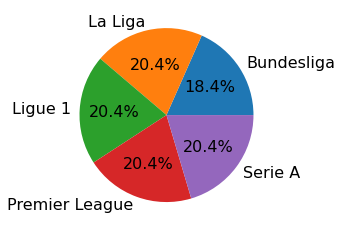

In [ ]:
ax = df[['Comp','Squad','Player']]\
                              .groupby(['Comp','Squad'])['Squad'].count()\
                              .groupby('Comp').count().plot\
                              .pie(textprops = {'fontsize': 16}, 
                              autopct = "%0.1f%%", pctdistance = 0.6);
ax.set_ylabel('');

**Jogadores por Liga**

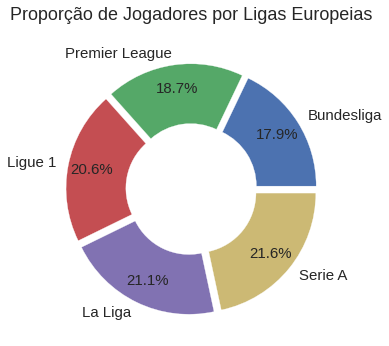

In [ ]:
plt.style.use("seaborn")  
ax = df.Comp.value_counts()\
                      .sort_values().plot\
                      .pie( wedgeprops=dict(width=0.5, edgecolor='w'), 
                            textprops = {'fontsize': 15},
                            explode = [0.05, 0.05, 0.05, 0.05, 0.05],
                            autopct = "%0.1f%%",pctdistance = 0.8);
ax.set_title("Proporção de Jogadores por Ligas Europeias", 
             fontsize = 18, pad = 20)
ax.set_ylabel('')
plt.show()

**Jogadores Por Posição**

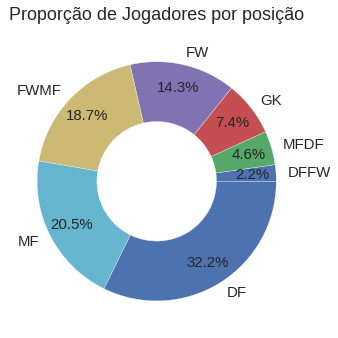

In [ ]:
ax = df.Pos.value_counts().sort_values().plot.pie( wedgeprops=dict(width=0.5, edgecolor='w'), 
                            textprops = {'fontsize': 15},
                            autopct = "%0.1f%%",pctdistance = 0.8);
                            
ax.set_title("Proporção de Jogadores por posição", 
             fontsize = 18, pad = 12)
ax.set_ylabel('')
plt.show()

**Jogadores por Nacionalidade**

*TOP 10 - Jogadores por Nacionalidade*


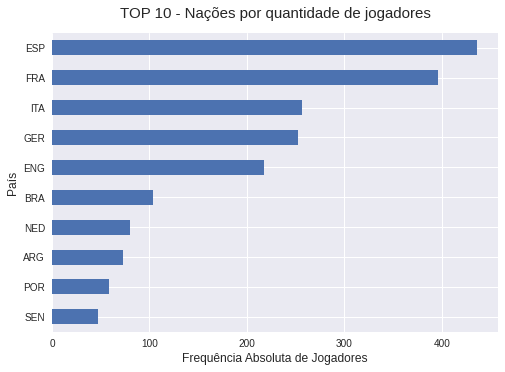

In [ ]:
plt.style.use("seaborn") 
fignationplay =df.Nation.\
                          value_counts()[0:10].\
                          sort_values().plot.barh()
plt.ylabel('País', fontsize = 12)
plt.xlabel("Frequência Absoluta de Jogadores", fontsize = 12)
fignationplay.spines['top'].set_visible(False)
fignationplay.spines['bottom'].set_visible(True)
fignationplay.spines['right'].set_visible(False)
fignationplay.xaxis.set_visible(True)
fignationplay.set_title("TOP 10 - Nações por quantidade de jogadores",
                        fontsize = 15, pad = 15)
plt.show()


Em se tratando da nacionalidade dos jogadores, a Espanha lidera o rank com o maior número de jogadores nas ligas Europeias de futebol, seguido de perto pela França

*TOP 10 - Nacionalidades Estrangeiras (Não Europeu)*

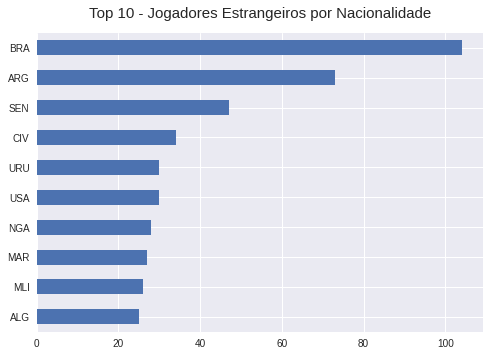

In [ ]:
ax = df[df['Foreign'] == 1]['Nation']\
      .value_counts()[0:10]\
      .sort_values()\
      .plot(kind = 'barh');
ax.set_title('Top 10 - Jogadores Estrangeiros por Nacionalidade', fontsize = 15,
             pad = 15)
plt.show()

Analisando apenas os "estrangeiros" (jogadores não europeus), o Brasil lidera o rank, com mais de 100 jogadores.

###Idade

**Distribuição**

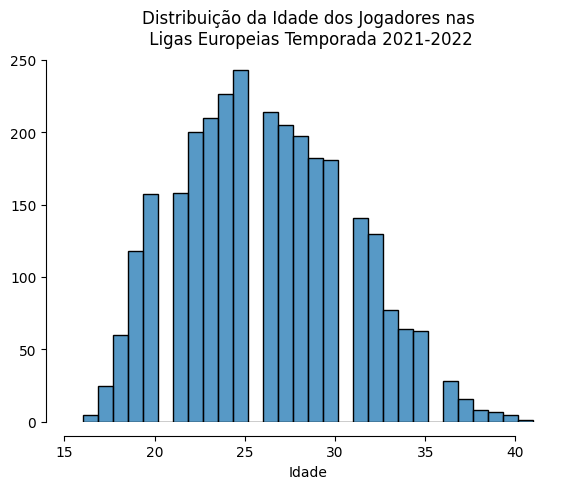

In [ ]:
plt.style.use("default") 
ax = sns.histplot(df, x = 'Age', bins = 'auto');
sns.despine(offset=10, trim=True);
ax.set(ylabel='',xlabel='Idade');
ax.set_title('Distribuição da Idade dos Jogadores nas\n Ligas Europeias Temporada 2021-2022');

Observa-se que a distribuição da idade dos jogadores das ligas europeias, na temporada 2021-2022, é normalmente distribuida, variando de 16 a 41 anos, com pico nos 25 anos.

**Por Liga**

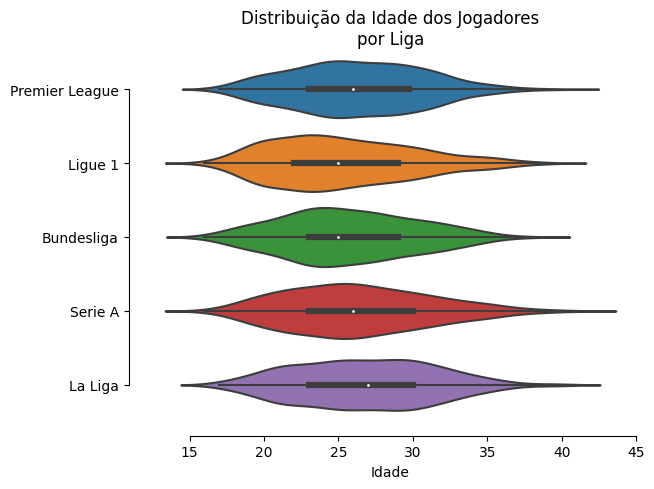

In [ ]:
ax = sns.violinplot(data = df,
                  x = 'Age',
                  y = 'Comp');
sns.despine(offset=10, trim=True);
ax.set(ylabel='',xlabel='Idade')
ax.set_title('Distribuição da Idade dos Jogadores\npor Liga');

Nessa imagem, podemos ver que apesar da diferença no quantitativo de jogadores, não existe diferença significativa no quesito idade dos jogadores.

**Por Posição**

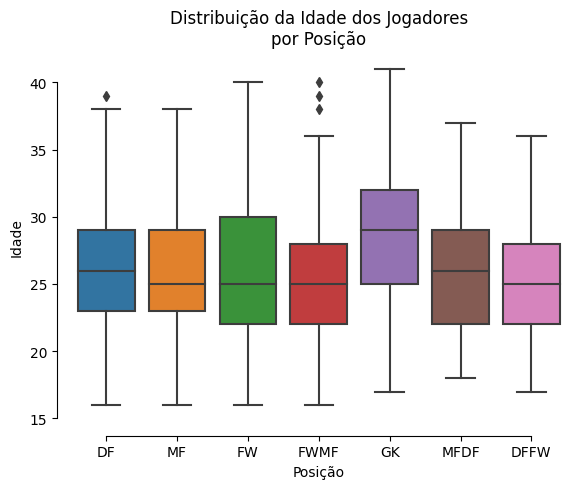

In [ ]:
ax = sns.boxplot(data = df,
              x = 'Pos',
              y = 'Age');
sns.despine(offset=10, trim=True);
ax.set(ylabel="Idade",xlabel='Posição')
ax.set_title('Distribuição da Idade dos Jogadores\npor Posição');

É possível observar que 50% dos goleiros têm idade superior aos 29 anos, enquanto que para as demais possições, cerca de 25% possuem mais de 29 anos.

###Faltas / Cartões

**Relação Faltas x Cartões**

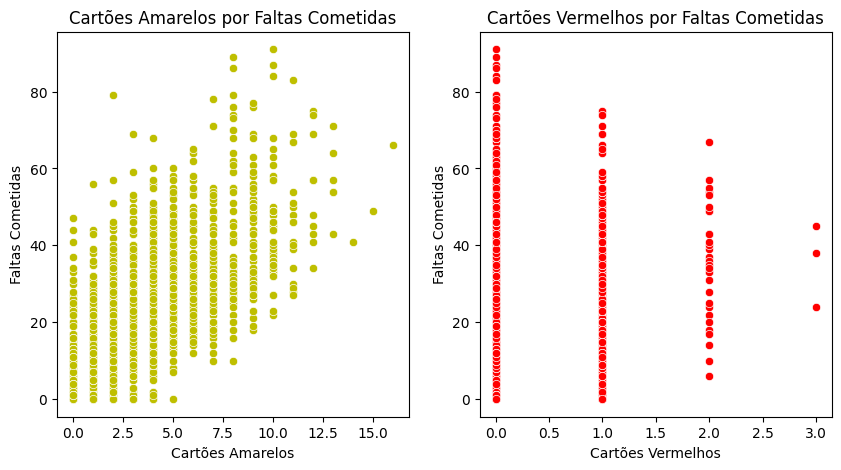

In [ ]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10,5))
cols = ['YCards', 'RCards']
titles = ['Cartões Amarelos', 'Cartões Vermelhos']
colors = ['y','r']

for col, ax, title, color in zip(cols,axes, titles, colors):
    sns.scatterplot(data = df, y = 'Fls', x = col, color= color, ax = ax)
    ax.set(ylabel="Faltas Cometidas",
           xlabel=title)
    ax.set_title(title +  ' por Faltas Cometidas')

Verfificando a relação entre faltas cometidas e cartões recebidos, observa-se uma relação crescente entre o número de faltas e os cartões amarelos (o que é esperado).

**Cartões Por Posição**

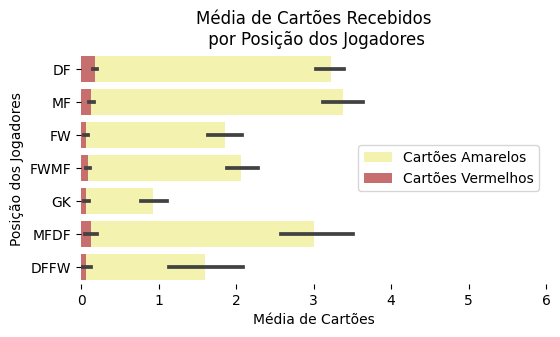

In [ ]:
f, ax = plt.subplots(figsize=(6, 3))

# Plot the yelow cards
sns.set_color_codes("pastel")
sns.barplot(x="YCards", y="Pos", data=df,
            label="Cartões Amarelos", color="y")

# Plot the red cards
sns.set_color_codes("muted")
sns.barplot(x="RCards", y="Pos", data=df,
            label="Cartões Vermelhos", color="r")

# Add a legend and informative axis label
ax.legend(ncol=1, loc="right", frameon=True)
ax.set(xlim=(0, 6), ylabel="Posição dos Jogadores",
       xlabel="Média de Cartões")
sns.despine(left=True, bottom=True)
ax.set_title('Média de Cartões Recebidos\n por Posição dos Jogadores');

Observou-se que os jogadores da defesa e meio de campo são os que mais recebem cartões amarelos, em média cerca de 3 cartões por temporada. O comportamento se repete para os cartões vermelhos, contudo com cerca de 0,2 cartões por temporada.

**Faltas/Cartões por Liga**

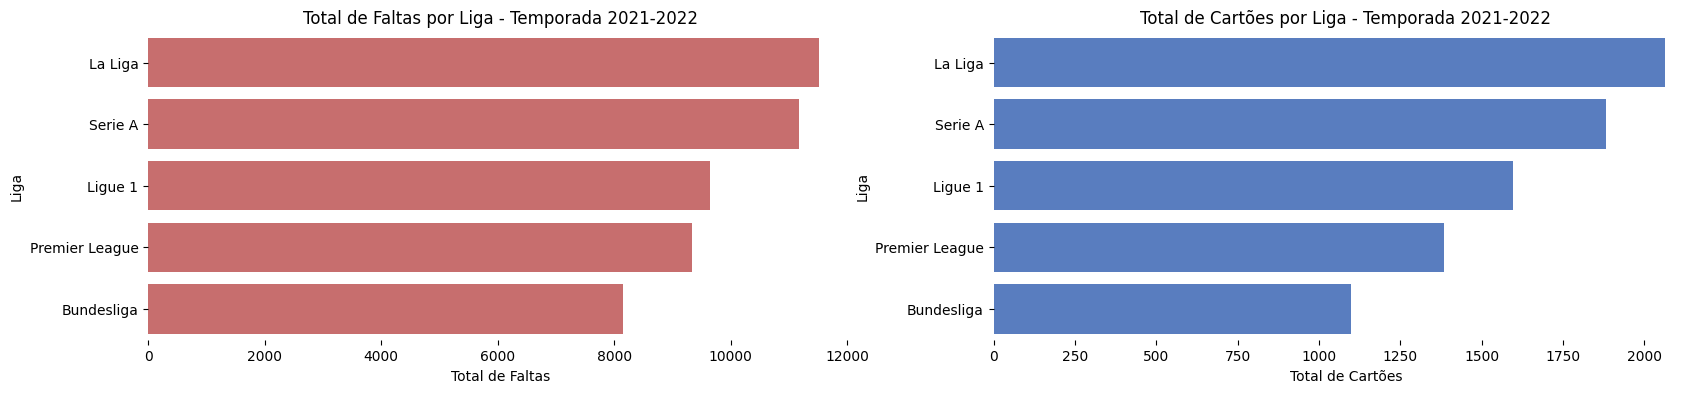

In [ ]:
df_falta = df.groupby('Comp')\
             [['Comp','Fls','Cards']]\
             .sum()\
             .reset_index()

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (20,4))
cols = ['Fls', 'Cards']
titles = ['Total de Faltas', 'Total de Cartões']
colors = ['r','b']

for col, ax, title, color in zip(cols, axes, titles, colors):
    sns.barplot(data=df_falta\
                          .sort_values(ascending = False, by = col),
                x=col,
                y="Comp",
                color=color,
                ax = ax)
    ax.set(ylabel="Liga",
          xlabel=title)
    sns.despine(left=True, bottom=True)
    ax.set_title(title + ' por Liga - Temporada 2021-2022');

Avaliando a quantidade de faltas e cartões aplicados, a La Liga é a mais violenta (maior número de faltas e cartão aplicados). Por outro lado, a Bundesliga é a competição com maior Fair Player.

**Faltas Por Time**

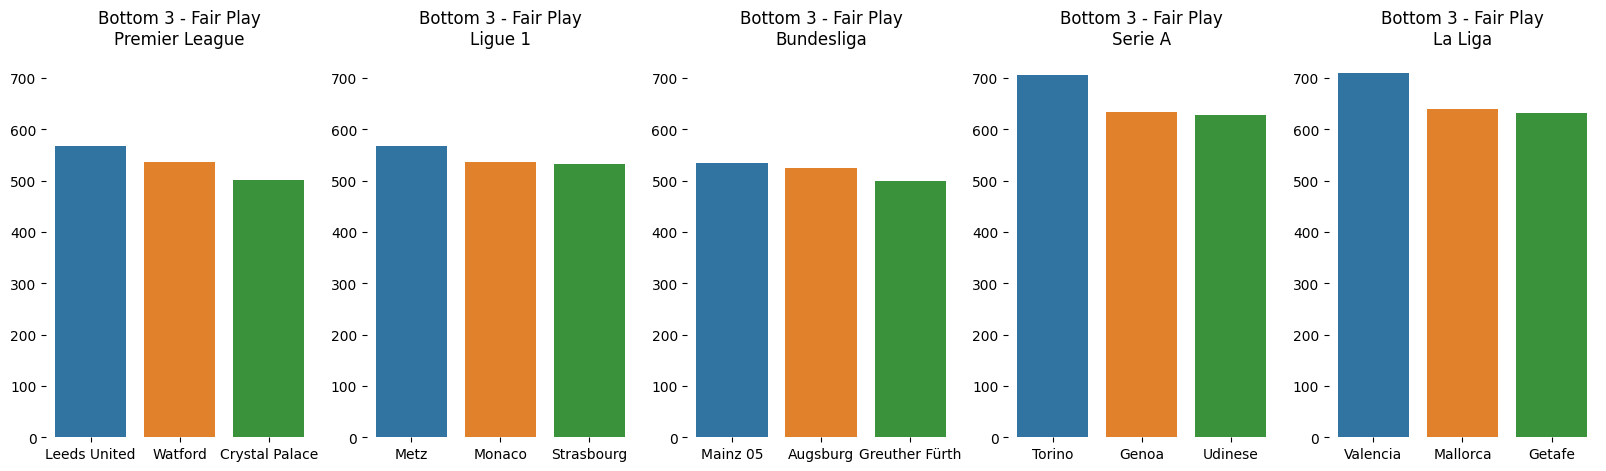

In [ ]:
df_falta = df.groupby(['Comp','Squad'])\
           [['Comp','Squad','Fls']]\
           .sum()\
           .sort_values(ascending = False, by = 'Fls')\
           .reset_index()

comps = list(df['Comp'].unique())

fig2, axes2 = plt.subplots(nrows = 1, ncols = 5, figsize = (20,5))

for comp, ax2 in zip(comps, axes2):
    sns.barplot(data=df_falta[df_falta['Comp'] == comp][:3],
                y="Fls",
                x="Squad",
                ax = ax2)
    ax2.set(xlabel="",
            ylabel='',
            ylim=(0, 750))
    sns.despine(left=True, bottom=True)
    ax2.set_title('Bottom 3 - Fair Play\n' + comp)

Considerando a quantidade de faltas, o gráfico apresenta os 3 times mais violentos de cada liga, onde observa-se que em sua maioria, são times de menor expressão.

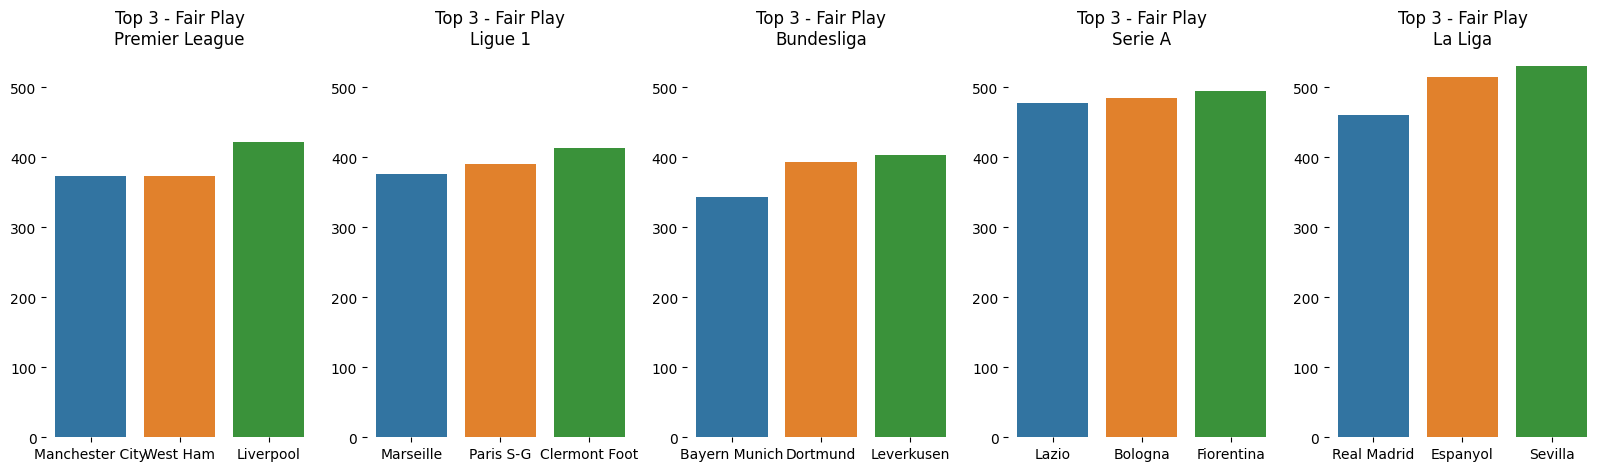

In [ ]:
df_falta = df.groupby(['Comp','Squad'])\
           [['Comp','Squad','Fls']]\
           .sum()\
           .sort_values(ascending = True, by = 'Fls')\
           .reset_index()

comps = list(df['Comp'].unique())

fig2, axes2 = plt.subplots(nrows = 1, ncols = 5, figsize = (20,5))

for comp, ax2 in zip(comps, axes2):
    sns.barplot(data=df_falta[df_falta['Comp'] == comp][:3],
                y="Fls",
                x="Squad",
                ax = ax2)
    ax2.set(xlabel="",
            ylabel='',
            ylim=(0, 550))
    sns.despine(left=True, bottom=True)
    ax2.set_title('Top 3 - Fair Play\n' + comp)

Considerando a quantidade de faltas, o gráfico apresenta o 3 times com a menor quantidade de faltas de cada Liga, onde dentre eles estão os maiores times de cada liga

###Gols

In [ ]:
df["Goals"].sum()

4971

**Por Idade**

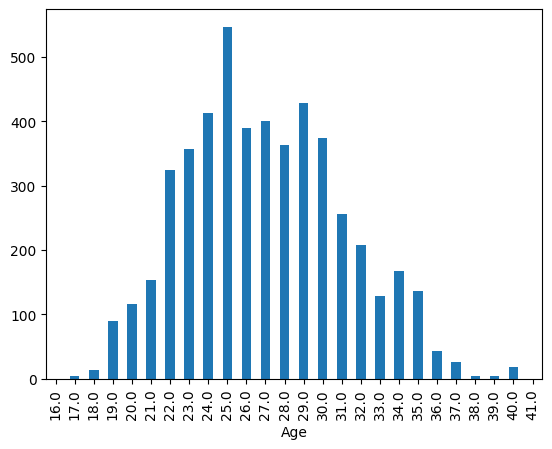

In [ ]:
#gols por idade
df.groupby('Age')['Goals'].sum().plot(kind='bar');

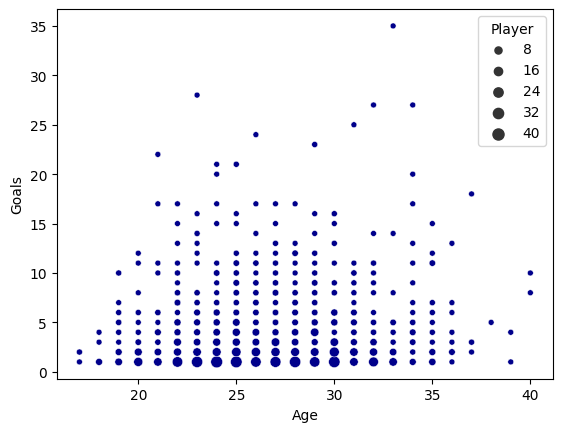

In [ ]:
df_goal_age = df.groupby(['Age','Goals'])['Player'].count().to_frame().reset_index()
sns.scatterplot(
    data=df_goal_age[df_goal_age['Goals']>0], x="Age", y="Goals", size="Player", color = 'DarkBlue')

**Por Posição**

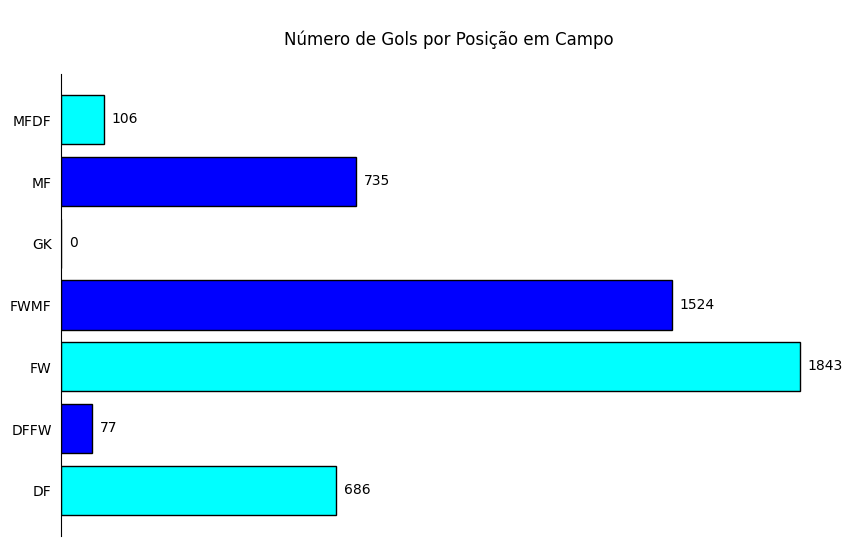

In [ ]:
#Posição que faz mais gol
a, b = df.groupby('Pos')['Goals'].sum().index , df.groupby('Pos')['Goals'].sum().values
plt.figure(figsize=(10, 6))
plt.barh(a, b, color =['cyan','blue'], edgecolor = 'black', linewidth=1)
plt.title('\nNúmero de Gols por Posição em Campo\n')
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False) 
plt.tick_params(axis='y', which='both', right=False, left=False, labelleft=True)
for pos in ['right', 'top', 'bottom']:
    plt.gca().spines[pos].set_visible(False) 
for index, value in enumerate(b):
    plt.text(value+20, index-.05, str(value))

**Por Time**

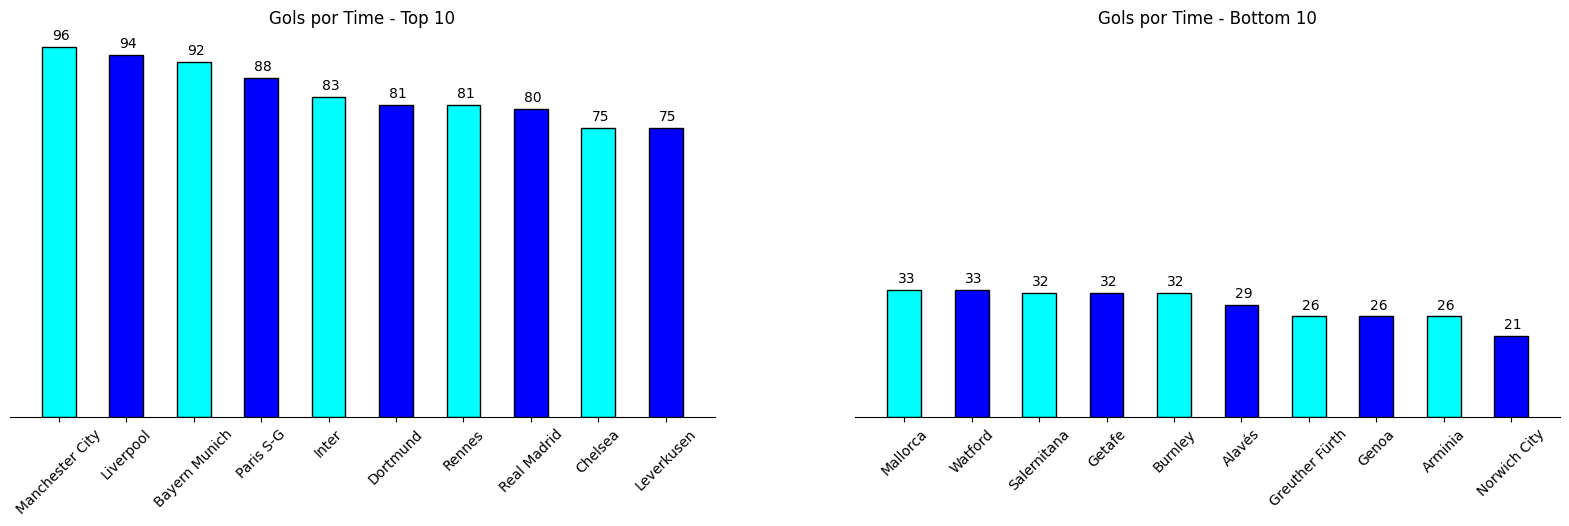

In [ ]:
timegol, qtdtimegol = df.groupby('Squad')['Goals'].sum().sort_values(ascending=False).index,\
                    df.groupby('Squad')['Goals'].sum().sort_values(ascending=False).values
fig_gol_time, (axtop, axless) = plt.subplots(1,2,figsize = (20,5))
axtop.bar(timegol[:10], qtdtimegol[:10], width=.5, color =['cyan','blue'], edgecolor = 'black', linewidth=1)
axtop.set_title('Gols por Time - Top 10')
axtop.set_xticklabels(timegol,rotation=45)
axtop.set_ylim(bottom=0, top=100)
for pos in ['right', 'top', 'left']:
    axtop.spines[pos].set_visible(False)
axtop.tick_params(axis='y', left=False, labelleft=False)

for index, value in enumerate(qtdtimegol[:10]):
    axtop.text(index-.1, value+2, str(value))

axless.bar(timegol[len(timegol)-10:], qtdtimegol[len(qtdtimegol)-10:], width=.5, color =['cyan','blue'], edgecolor = 'black', linewidth=1)
axless.set_title('Gols por Time - Bottom 10')
axless.set_xticklabels(timegol[len(timegol)-10:],rotation=45)
axless.set_ylim(bottom=0, top=100)
for pos in ['right', 'top', 'left']:
    axless.spines[pos].set_visible(False)
axless.tick_params(axis='y', left=False, labelleft=False)
for index, value in enumerate(qtdtimegol[len(qtdtimegol)-10:]):
    axless.text(index-.1, value+2, str(value));

**Por Liga**

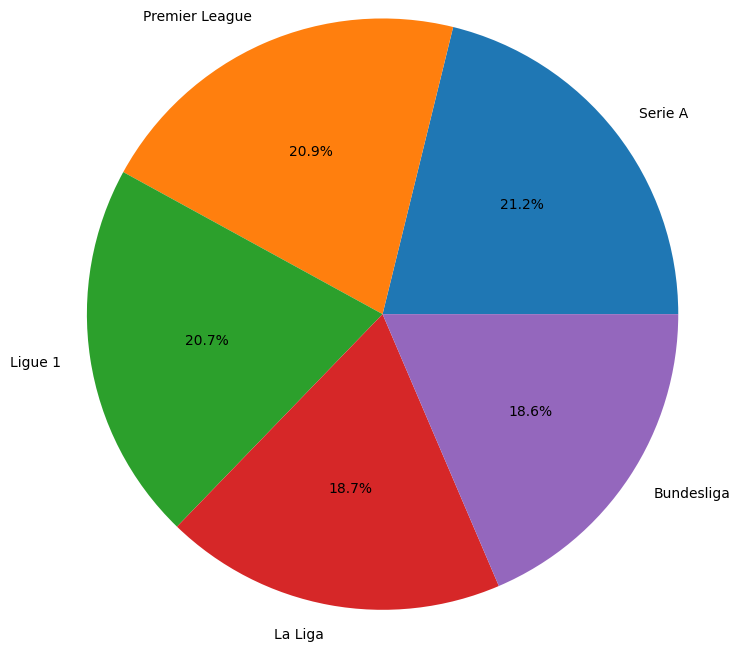

In [ ]:
ligagol, qtdligagol = df.groupby('Comp')['Goals'].sum().sort_values(ascending=False)[:20].index,\
                    df.groupby('Comp')['Goals'].sum().sort_values(ascending=False)[:20].values
qtdligagol = (list(qtdligagol))
fig_gol_time, ax = plt.subplots()
ax.pie(qtdligagol, labels=ligagol, radius=2, autopct = '%1.1f%%');

**Por Jogador**

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 154 missing from current font.

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 154 missing from current font.



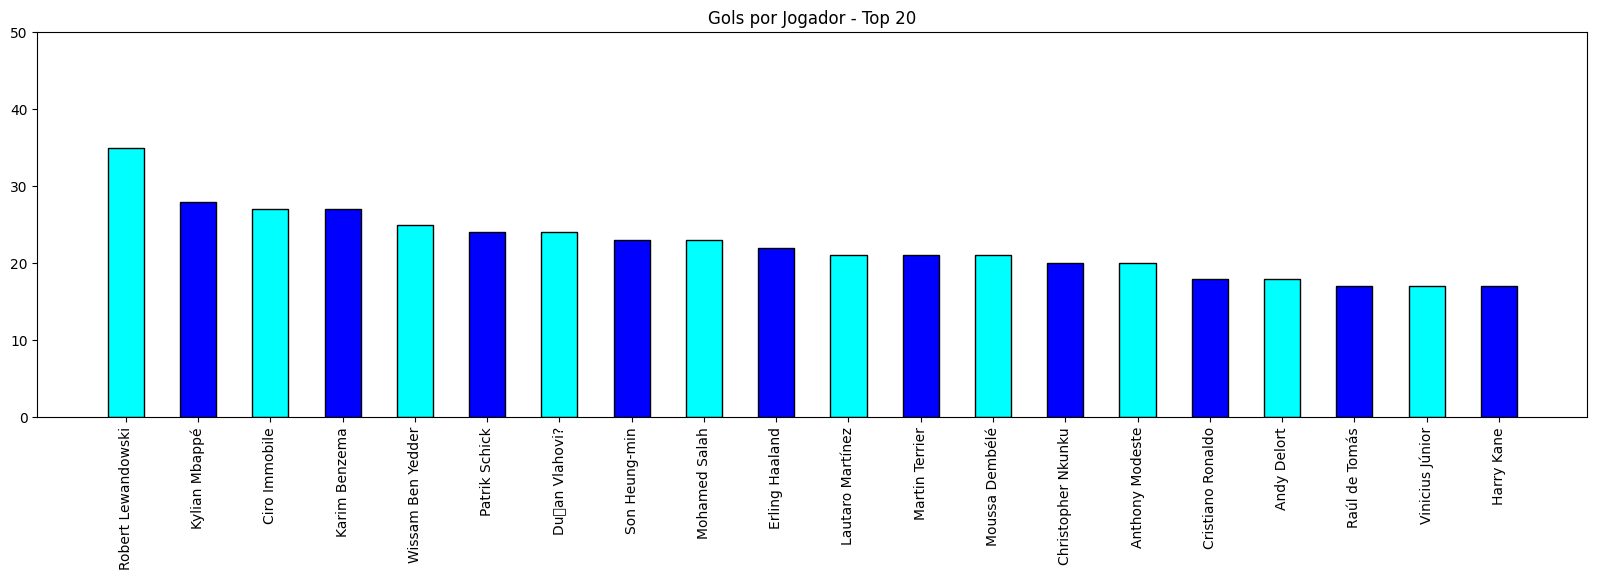

In [ ]:
playergol, qtdplayergol = df.groupby('Player')['Goals'].sum().sort_values(ascending=False).index,\
                    df.groupby('Player')['Goals'].sum().sort_values(ascending=False).values
fig_gol_time, axtop = plt.subplots(figsize = (20,5));
axtop.bar(playergol[:20], qtdplayergol[:20], width=.5, color =['cyan','blue'], edgecolor = 'black', linewidth=1);
axtop.set_title('Gols por Jogador - Top 20');
axtop.set_xticklabels(playergol[:20],rotation=90);
axtop.set_ylim(bottom=0, top=50);

###Penaltis

**Por Jogador**

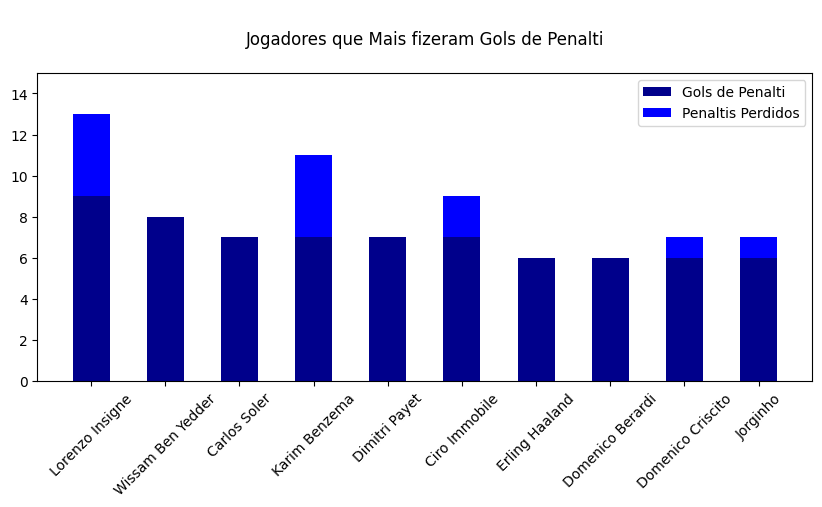

In [ ]:
#Jogadores que Mais fizeram Gols de Penalti
w = df[['Player','PKLoss', 'PKGoals']].sort_values(by='PKGoals', ascending=False)[:10]['Player'].values
z = df[['Player','PKLoss', 'PKGoals']].sort_values(by='PKGoals', ascending=False)[:10]['PKLoss'].values
v = df[['Player','PKLoss', 'PKGoals']].sort_values(by='PKGoals', ascending=False)[:10]['PKGoals'].values

fig, ax1 = plt.subplots(figsize = (10,4))
ax.bar(w, z, width=.5)
ax.set_xticklabels(w,rotation=65);

ax1.bar(w[:10], v[:10], .5, label='Gols de Penalti', color='darkblue')
ax1.bar(w[:10], z[:10], .5, bottom=v[:10], label='Penaltis Perdidos', color='blue')
ax1.set_title('\nJogadores que Mais fizeram Gols de Penalti\n')
ax1.set_ylim(bottom=0, top=15)
ax1.set_xticklabels(w[:10],rotation=45);
ax1.legend()

**Penaltis perdidos por Liga**

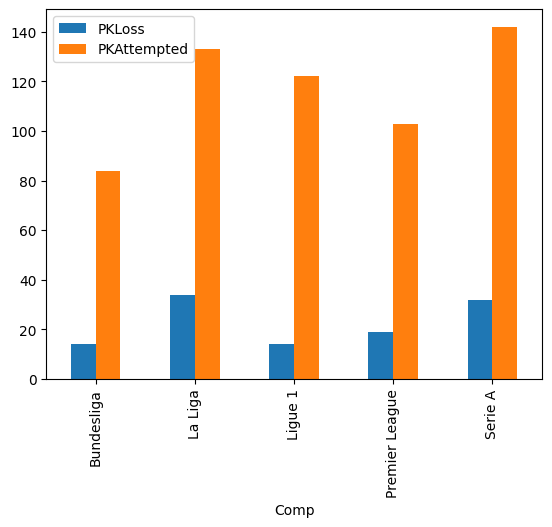

In [ ]:
df.groupby('Comp')[['PKLoss','PKAttempted']].sum().plot(kind='bar');

**Gols de Penalti Por Posição**

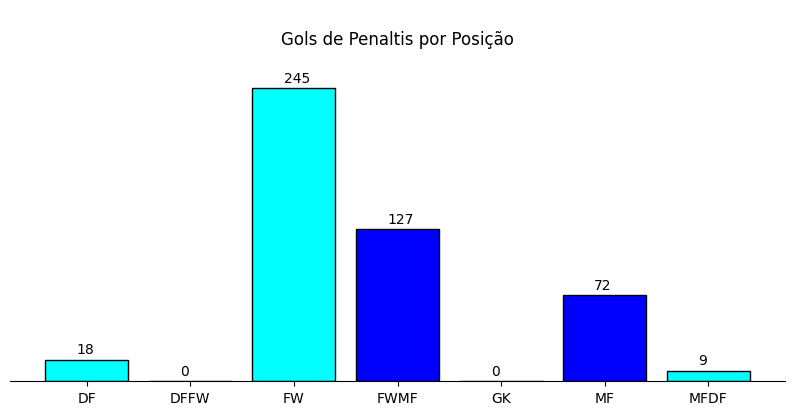

In [ ]:
#Posição que Cobra mais gol de penalti
c, d = df.groupby('Pos')['PKGoals'].sum().index , df.groupby('Pos')['PKGoals'].sum().values

fig, ax = plt.subplots(figsize = (10,4))
ax.set_title('\nGols de Penaltis por Posição\n')
ax.bar(c, d, color =['cyan','blue'], edgecolor = 'black', linewidth=1)
ax.set_xticklabels(c,rotation=0);

for pos in ['right', 'top', 'left']:
    ax.spines[pos].set_visible(False)

for index, value in enumerate(d):
    ax.text(index-.1, value+5, str(value))
ax.tick_params(axis='y', left=False, labelleft=False)


**Desempenho por Time**

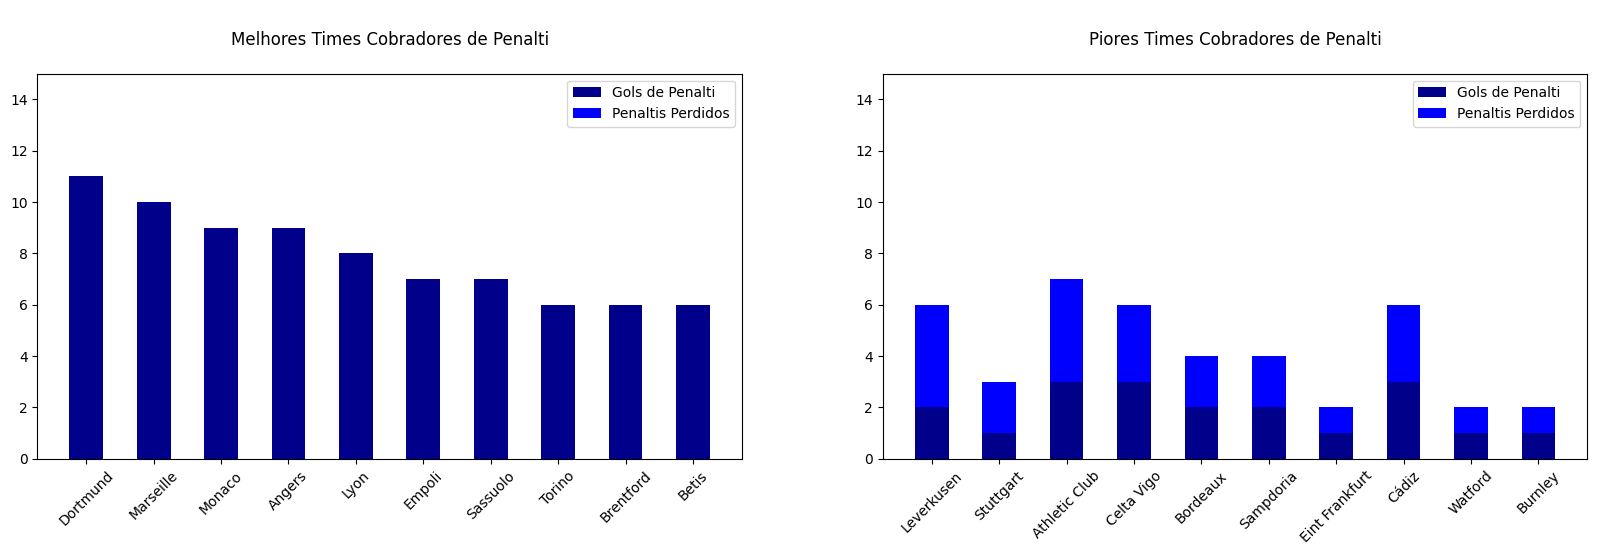

In [ ]:
#Times convertedores de Penalti - TOP 10 , BOTTOM 10
df2 = df.groupby('Squad').sum()
df2['PKLoss%'] = df2['PKLoss'] / df2['PKAttempted']
df2 = df2.sort_values(by='PKLoss%', ascending=False).reset_index()
f, g, h = df2['Squad'], df2['PKLoss'], df2['PKGoals']
i, j, k = df2[df2['PKLoss%']==0].sort_values(by='PKGoals', ascending=False)[:10]['Squad'],\
            df2[df2['PKLoss%']==0].sort_values(by='PKGoals', ascending=False)[:10]['PKLoss'],\
            df2[df2['PKLoss%']==0].sort_values(by='PKGoals', ascending=False)[:10]['PKGoals']

fig, (ax2, ax1) = plt.subplots(1,2, figsize=(20,5))

ax1.bar(f[:10], h[:10], .5, label='Gols de Penalti', color='darkblue')
ax1.bar(f[:10], g[:10], .5, bottom=h[:10], label='Penaltis Perdidos', color='blue')
ax1.set_title('\nPiores Times Cobradores de Penalti\n')
ax1.set_ylim(bottom=0, top=15)
ax1.set_xticklabels(f[:10],rotation=45);
ax1.legend()

ax2.bar(i[:10], k[:10], .5, label='Gols de Penalti', color='darkblue')
ax2.bar(i[:10], j[:10], .5, bottom=k[:10], label='Penaltis Perdidos', color='blue')
ax2.set_title('\nMelhores Times Cobradores de Penalti\n')
ax2.set_ylim(bottom=0, top=15)
ax2.set_xticklabels(i[:10],rotation=45);
ax2.legend();

###Jogadores

**Assistências**

In [ ]:
df_group_player = df.sort_values(by='Assist').iloc[-10:]
fig = px.bar(df_group_player, y='Player', x='Assist', 
            title="<b>Top 10 - Assistências por Jogador</b>",
            text_auto=True,
            template = 'none',
            labels = {'Assist': 'Assistência', 'Player': 'Jogador', 'Nation': 'Nação'},
            range_x=[0, (df_group_player['Assist'].max()+2)],
            orientation='h',
            color="Nation"
            )
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.update_layout(
    barmode='stack',
    title_x = 0.5,
    xaxis=dict(
        title='',
        titlefont_size=16,
        tickfont_size=12,
        showticklabels=False,
        showgrid=False
    ),
    yaxis=dict(title=''),
    autosize=False,
    width=700,
    height=400,
    margin=dict(l=200, r=20, t=100, b=20)
)
fig.show()

No gráfico acima, dos 10 jogadores com mais assistência em jogo, é possível identificar nomes conhecidos que estão entre os passes mais caros no mundo do Futebol, conforme lista do Transfermarkt. Parametro de relevância para valorização do passe.

[Acesso ao Transfermarkt](https://www.transfermarkt.com.br/spieler-statistik/wertvollstespieler/marktwertetop)

**Jogadores por Cartão Vermelho**

In [ ]:
df_group_player_rcard = df.sort_values(by='RCards').iloc[-10:]
fig = px.bar(df_group_player_rcard, y='Player', x='RCards', 
            title="<b>Top 10 - Cartões Vermelhos por Jogador</b>",
            text_auto=True,
            template = 'none',
            labels = {'Player': 'Jogador', 'Nation': 'Nação', 'RCards':'Cartões'},
            range_x=[0, (df_group_player['Assist'].max()+2)],
            orientation='h',
            color='Nation'
            )
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.update_layout(
    barmode='stack',
    title_x = 0.5,
    xaxis=dict(
        title='',
        titlefont_size=16,
        tickfont_size=12,
        showticklabels=False,
        showgrid=False
    ),
    yaxis=dict(title=''),
    autosize=False,
    width=700,
    height=400,
    margin=dict(l=200, r=20, t=100, b=20)
)
fig.show()

**Jogadores por Cartão Amarelo**

In [ ]:
df_group_player_rcard = df.sort_values(by='YCards').iloc[-10:]
fig = px.bar(df_group_player_rcard, y='Player', x='YCards', 
            title="<b>Top 10 - Cartões Amarelos por Jogador</b>",
            text_auto=True,
            template = 'none',
            labels = {'Player': 'Jogador', 'Nation': 'Nação', 'YCards':'Cartões'},
            range_x=[0, (df_group_player['Assist'].max()+2)],
            orientation='h',
            color='Nation'
            )
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.update_layout(
    barmode='stack',
    title_x = 0.5,
    xaxis=dict(
        title='',
        titlefont_size=16,
        tickfont_size=12,
        showticklabels=False,
        showgrid=False
    ),
    yaxis=dict(title=''),
    autosize=False,
    width=700,
    height=400,
    margin=dict(l=200, r=20, t=100, b=20)
)
fig.show()

Os gráficos acima, dos 10 jogadores com mais cartões em jogo, é extremamente importante, pois influem diretamente no valor do passe e implica diretamente no investimento em publicidade, tanto para o time quanto para o atleta.

#4 . Conclusão

Essa análise se mostrou importante e, a princípio, suficiente para apoiar a tomada de decisão em diversos seguimentos, desde o investimento até a aplicação e correção técnica e tática do time e dos jogadores. Sendo possível, ainda, aprofundar a análise e o estudo com a aplicação de algoritmos de Machine Learning e Inteligência Artificial, em uma análise bivariada e multivariada, buscando encontrar padrões e correlações mais precisas para aumentar a assertividade na tomada de decisão.